# Principal Component Analysis

PCA is a technique used to reduce the dimensionality of the dataset. 

## Helicopter View into simple PCA Decomposition 

Let's make sure that we run the following command to install all needed packages:
`pip install -r requirements.txt`

Next, we're ready to import all relevant packages that were just installed:
* `numpy` for basic mathematical operations
* `pandas` for dataset manipulations 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

We're now ready to use them to generate a simple dataset. We'll implement a data-generating function the results of which we'll be using as inputs to our PCA. 

The **aim of our exercise is to show, that results of principal components analysis align with theoretical, expected outcomes** for the dataset generated using the above function.

Our samples will be drawn from a Gaussian distribution in two dimensions, as follows:

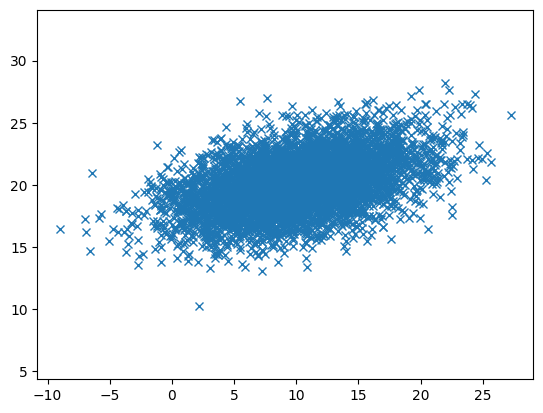

In [2]:
means = [10, 20]  # Means of marginal distributions
cov = [[25, 5], [5, 5]]  # diagonal covariance
x, y = np.random.multivariate_normal(means, cov, 5000).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

PCA is based on eigenvalues and eigenvectors which can be computed using `numpy`:

In [3]:
values, vectors = np.linalg.eig(cov)
values[:5]

array([26.18033989,  3.81966011])

In [4]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print(f"Total explained variance = {np.sum(explained_variances) * 100}%\nIndividual explained variances = {explained_variances}\n")

Total explained variance = 100.0%
Individual explained variances = [0.872677996249965, 0.12732200375003505]



We can see, that the variance is explained fully by the first two components. The first component explains over 87% of variance in the data. This is as expected, because the data was generated using two variables only. 

## What's Going on in Depth?

PCA is based on the process of ***eigendecomposition of the covariance matrix***. 

### Step 1 - Covariance

**Covariance** of two variables is a measure of their joint variance. It describes how **two parameters vary together**. 

We can infer a couple of interesting facts about the covariance matrix from that definition:
* Diagonal elements of the covariance matrix should describe the variance of individual variables. This is because they contain information about the variability of the pair of values $(e1, e1)$ which is essentially the same as the variability of $e1$ for some variable $e1$.
* Another observation is that the matrix should be symmetrical with respect to the transposition. That means, that elements $(e1, e2)$ vary in the same exact way as elements $(e2, e1)$. Note, that python libraries will raise a warning if the covariance matrix does not have that property.

### Step 2 - Eigendecomposition

The goal of this step is to find features (variables) which help explain the most of the original variance. That is to say, that if we exclude the remaining variables from the data set, we would observe the smallest possible decrease in overall variance given the number of features that we want to keep. 

Eigenvectors of a matrix which is symmetric (we know it is as per the above section) will be orthogonal - they will define a coordinate system. In that system, eigenvalues of the same matrix will contain information about feature importance. The largest eigenvalue will be connected to a direction which is explaining overall variance the most. Using this we can achieve the original goal of reducing the dimensionality in the original data set.

### Step 3 - Visualising the New Coordinate System

Let's apply our knowledge to the previous example data set:

In [12]:
# Let's define a simple function that will format a vector for later printing
def print_vector(v):
    return( "({}, {})" ).format(round(v[ 0 ], 2), round(v[ 1 ], 2))

In [54]:
# Eigenvectors obtained through the decomposition:
for i, v in enumerate(zip( vectors, values )):
    # Using the small helper function defined above
    print( f"Eigenvector {i}:\t{print_vector(v[ 0 ])} with value {round(v[ 1 ], 2)}" )

Eigenvector 0:	(0.97, -0.23) with value 26.18
Eigenvector 1:	(0.23, 0.97) with value 3.82


These eigenvectors are two-dimensional. We can easily plot them over the original data set as follows:

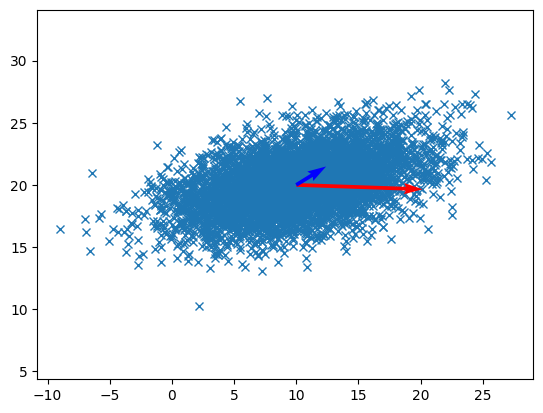

In [55]:
origin = [[means[0], means[0]], [means[1], means[1]]]

plt.plot(x, y, 'x', zorder=1)
plt.axis('equal')
plt.quiver(*origin, vectors[:,0]*values[0], vectors[:,1]*values[1], 
           color=['r','b'], scale=100, zorder=2)
plt.show()

## References
* https://towardsdatascience.com/principal-component-analysis-pca-from-scratch-in-python-7f3e2a540c51